## Orders details grouped by orders with items counts and aggregates

Each order row has a number of order_detail entries which detail each item that was purchased and have details like name, ean, timestamps, etc. These details are grouped by order so we can have a line per order to join with other order information like delivery windows, store, customer, courier, etc.

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
details = pd.read_csv("../data/order_detail.csv", low_memory=False)
details.tail(100)

FileNotFoundError: File b'../data/order_detail.csv' does not exist

In [3]:
# count number of items in each order
dt1 = details.order_id.value_counts().reset_index(name='items_total')
dt1.rename(index=str, columns={"index": "order_id"}, inplace=True)
dt1.set_index("order_id", inplace=True)
dt1.head(20)

,items_total
order_id,
529853,261
691423,251
529155,238
529185,238
275418,225
606637,205
829165,205
561525,201
561517,201


In [4]:
# count number of items with variable weight
details_by_order = details.groupby(['order_id'])
dt2 = details_by_order['variable_weight'].sum().reset_index(name='items_with_variable_weight')
dt2.set_index("order_id", inplace=True)
dt2.tail(20)

,items_with_variable_weight
order_id,
980922,1
980924,8
980926,0
980928,2
980930,8
980932,0
980934,0
980936,2
980938,3


In [5]:
# find first and last timestamp
details_touched = details.dropna(subset=["touched_at"])
details_grouped = details_touched.groupby(['order_id'])

dt_first = details_grouped['touched_at'].min().reset_index(name='first_touched_at')
dt_first.set_index("order_id", inplace=True)

dt_last = details_grouped['touched_at'].max().reset_index(name='last_touched_at')
dt_last.set_index("order_id", inplace=True)

dt3 = pd.merge(dt_first, dt_last, on="order_id")
dt3.tail(20)

,first_touched_at,last_touched_at
order_id,,
980922,None,None
980924,None,None
980926,None,None
980928,None,None
980930,None,None
980932,None,None
980934,None,None
980936,None,None
980938,None,None


In [6]:
# merge it all together
dtm = pd.merge(dt1, dt2, on="order_id")
dtm = pd.merge(dtm, dt3, on="order_id")
dtm.tail(20)

,items_total,items_with_variable_weight,first_touched_at,last_touched_at
order_id,,,,
121264,1,0,None,None
756395,1,0,2018-09-26 11:28:48,2018-09-26 11:28:48
134040,1,0,None,None
776439,1,0,2018-10-08 16:19:03,2018-10-08 16:19:03
158612,1,0,None,None
151814,1,0,None,None
55700,1,0,None,None
117742,1,0,None,None
96674,1,0,None,None


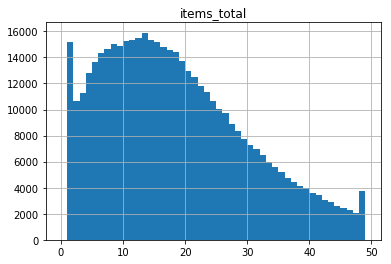

In [17]:
hist = dtm[["items_total"]].hist(bins=range(0,50,1))

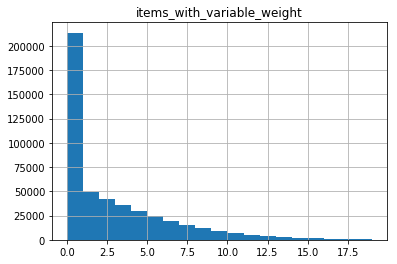

In [16]:
hist = dtm[["items_with_variable_weight"]].hist(bins=range(0,20,1))

In [8]:
dtm.to_csv("001-orders-details-grouped-by-order.csv")
print("Saved %d orders details" % len(dtm))

Saved 479963 orders details
